In [220]:
%pip install openpyxl
!python3 -m pip install plotly


99414.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


99420.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [199]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

#TIP: Ensure the dataset file exists and is in the same directory as this jupyter notebook.

#Load Excel File:
SDOH_df = pd.read_excel('SDOH_Dataset.xlsx')


# Display the first few rows of the dataframe to ensure it is loaded correctly
display(SDOH_df.head(10))

,ZIPCODE,ZCTA,STATE,ACS_TOT_POP_WT_ZC,ACS_PCT_CHILD_DISAB_ZC,ACS_PCT_DISABLE_ZC,ACS_PCT_HISPANIC_ZC,ACS_MEDIAN_AGE_ZC,ACS_PCT_FEMALE_ZC,ACS_PCT_MALE_ZC,...,county,Median HPSA Score,Median AQI,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Vaccinated
0,93928,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Monterey,15.0,37.0,18.3,3.455596,4.436613,31.7,8.2,24.9,50
1,95836,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sacramento,9.0,34.0,14.5,3.263923,4.815922,30.7,8.0,21.2,46
2,91023,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
3,93581,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kern,14.0,52.0,21.2,3.964160,5.003990,35.0,7.1,28.1,40
4,93530,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Inyo,11.0,58.0,13.8,3.257547,5.076591,29.7,7.8,19.0,37
5,92158,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,San Diego,0.0,46.0,13.4,3.021765,4.451347,28.4,8.5,20.3,46
6,93246,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kings,10.0,NaN,20.1,3.888632,4.806345,35.1,7.6,27.6,39
7,90099,90001.0,California,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
8,90060,90001.0,California,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
9,90054,90001.0,California,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43


In [200]:
#Preview and test Loaded Data

SDOH_df.head()
SDOH_df.info()
SDOH_df.describe()
SDOH_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ZIPCODE                                      2585 non-null   int64  
 1   ZCTA                                         2578 non-null   float64
 2   STATE                                        2585 non-null   object 
 3   ACS_TOT_POP_WT_ZC                            2578 non-null   float64
 4   ACS_PCT_CHILD_DISAB_ZC                       2466 non-null   float64
 5   ACS_PCT_DISABLE_ZC                           2543 non-null   float64
 6   ACS_PCT_HISPANIC_ZC                          2552 non-null   float64
 7   ACS_MEDIAN_AGE_ZC                            2536 non-null   float64
 8   ACS_PCT_FEMALE_ZC                            2552 non-null   float64
 9   ACS_PCT_MALE_ZC                              2552 non-null   float64
 10  

ZIPCODE                                          0
ZCTA                                             7
STATE                                            0
ACS_TOT_POP_WT_ZC                                7
ACS_PCT_CHILD_DISAB_ZC                         119
ACS_PCT_DISABLE_ZC                              42
ACS_PCT_HISPANIC_ZC                             33
ACS_MEDIAN_AGE_ZC                               49
ACS_PCT_FEMALE_ZC                               33
ACS_PCT_MALE_ZC                                 33
ACS_PCT_ENGL_NOT_WELL_ZC                        33
county                                           1
Median HPSA Score                                1
Median AQI                                     154
% Fair or Poor Health                            0
Average Number of Physically Unhealthy Days      0
Average Number of Mentally Unhealthy Days        0
% Adults with Obesity                            0
Food Environment Index                           0
% Physically Inactive          

COVERT DATA TYPES

In [201]:

#ZIP codes as string to preserve leading zeros --> When a list is exported as a .csv file and contains a zip code beginning with a 0
#its recorded within the .csv as “01234” because zip codes are five digits.-- How to Avoid Dropping Zeros of ZIPcodes

SDOH_df['ZIPCODE'] = SDOH_df['ZIPCODE'].astype(str)

#percentage as float for calculations and plots:

percent_cols = [
    'ACS_PCT_CHILD_DISAB_ZC', 'ACS_PCT_DISABLE_ZC', 'ACS_PCT_HISPANIC_ZC',
    'ACS_PCT_FEMALE_ZC', 'ACS_PCT_MALE_ZC', 'ACS_PCT_ENGL_NOT_WELL_ZC',
    '% Fair or Poor Health', '% Adults with Obesity', '% Physically Inactive',
    '% Vaccinated']

for col in percent_cols:
    SDOH_df[col] = pd.to_numeric(SDOH_df[col], errors='coerce')

In [202]:
#what columns do we actualy have access to?
SDOH_df.columns

Index(['ZIPCODE', 'ZCTA', 'STATE', 'ACS_TOT_POP_WT_ZC',
       'ACS_PCT_CHILD_DISAB_ZC', 'ACS_PCT_DISABLE_ZC', 'ACS_PCT_HISPANIC_ZC',
       'ACS_MEDIAN_AGE_ZC', 'ACS_PCT_FEMALE_ZC', 'ACS_PCT_MALE_ZC',
       'ACS_PCT_ENGL_NOT_WELL_ZC', 'county', 'Median HPSA Score', 'Median AQI',
       '% Fair or Poor Health', 'Average Number of Physically Unhealthy Days',
       'Average Number of Mentally Unhealthy Days', '% Adults with Obesity',
       'Food Environment Index', '% Physically Inactive', '% Vaccinated'],
      dtype='object')

#### Question 1: Which ZIP code(s) have the largest population of people who speak English not well?

Codebook: 'ACS_PCT_ENGL_NOT_WELL_ZC'

97284.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Largest limited English population ZIP code: 90011 with 19304 people


/var/folders/2s/hk7_k3356hvdtvgc2z21_76r0000gn/T/ipykernel_3626/2143932024.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




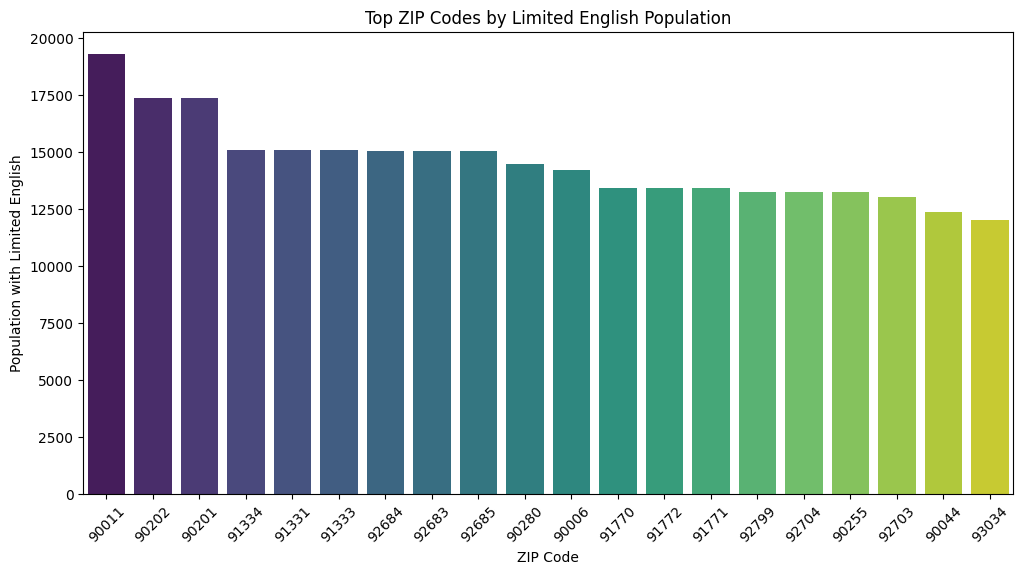

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!python3 -m pip install nbformat

# Calculate population with limited English proficiency
SDOH_df['Limited_English_Pop'] = (
    SDOH_df['ACS_TOT_POP_WT_ZC'] * SDOH_df['ACS_PCT_ENGL_NOT_WELL_ZC'] / 100
)

# Ensure ZIP codes are 5-digit strings
SDOH_df['ZIPCODE'] = SDOH_df['ZIPCODE'].astype(str).str.zfill(5)

# Find ZIP code with largest population
max_zip = SDOH_df.loc[SDOH_df['Limited_English_Pop'].idxmax(), 'ZIPCODE']
max_value = SDOH_df['Limited_English_Pop'].max()
print(f"Largest limited English population ZIP code: {max_zip} with {max_value:.0f} people")

# Bar chart (top 20 ZIP codes)
top20 = SDOH_df.sort_values('Limited_English_Pop', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(data=top20, x='ZIPCODE', y='Limited_English_Pop', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top ZIP Codes by Limited English Population')
plt.xlabel('ZIP Code')
plt.ylabel('Population with Limited English')
plt.show()

# Choropleth map (California ZIP codes) using new choropleth_map
fig = px.choropleth_map(
    SDOH_df,
    geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ca_california_zip_codes_geo.min.json",
    locations="ZIPCODE",
    featureidkey="properties.ZCTA5CE10",
    color="Limited_English_Pop",
    hover_name="ZIPCODE",
    hover_data=["Limited_English_Pop", "county"],
    title="Population with Limited English Proficiency by ZIP Code in California",
    center={"lat": 36.7783, "lon": -119.4179},
    zoom=5
)
fig.show()



#### Answer: ZIP code 90011 has the largest population of residents who speak English “not well,” with approximately 19,500 people. Other ZIP codes with large limited-English populations include 90202 and 90201 (both around 17,000 people). Most of the top ZIP codes are concentrated in Los Angeles County.

#### Question 2: Which ZIP code(s) has the highest percentage of residents reporting fair/poor health? 

Codebook:  '% Fair or Poor Health', 'ZIPCODE'

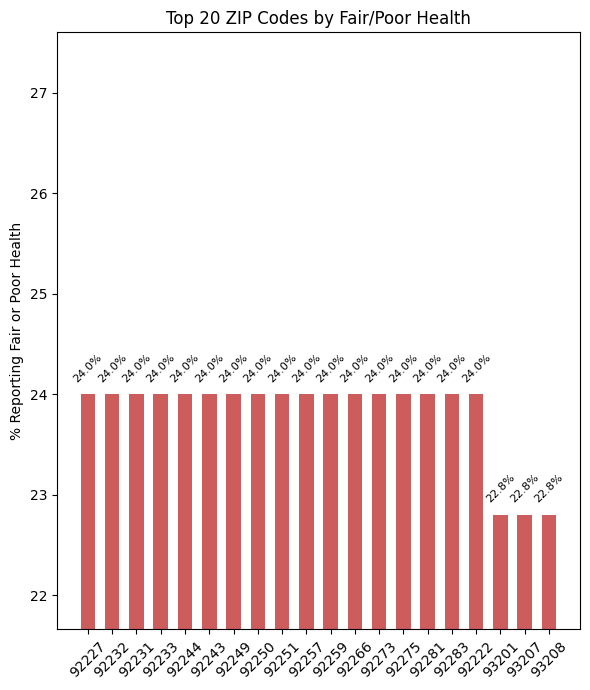

In [208]:
#zip with highest % of reporting poor health:

import pandas as pd
import matplotlib.pyplot as plt

SDOH_df = pd.read_excel('SDOH_Dataset.xlsx')


top_health = SDOH_df.nlargest(20, "% Fair or Poor Health")
# Ensure ZIPCODE is string so matplotlib treats them as categories
top_health["ZIPCODE"] = top_health["ZIPCODE"].astype(str)

plt.figure(figsize=(6,7))
bars =plt.bar(
    top_health["ZIPCODE"], top_health["% Fair or Poor Health"], width=0.6, color='indianred')

plt.xticks(rotation=45)
plt.ylabel("% Reporting Fair or Poor Health")
plt.title("Top 20 ZIP Codes by Fair/Poor Health")
plt.ylim(top_health["% Fair or Poor Health"].min() * 0.95, top_health["% Fair or Poor Health"].max() * 1.15)


#add labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.1,  # a little above the bar
        f"{height:.1f}%",  # one decimal + %
        ha='center', va='bottom', fontsize=8, rotation=45
    )

plt.tight_layout()
plt.show()




In [ ]:
#to show the zip with the HIGHEST %: 
max_row = SDOH_df.loc[SDOH_df["% Fair or Poor Health"].idxmax()]

print("ZIP code with highest % Fair/Poor Health:", max_row["ZIPCODE"])
print("Percentage of residents reporting fair/poor health:", max_row["% Fair or Poor Health"])


#the bars look similar? The values in the top ZIP codes are very close together.
# SDOH_df["% Fair or Poor Health"].dtype

print(top_health[["ZIPCODE", "% Fair or Poor Health"]])

ZIP code with highest % Fair/Poor Health: 92227
Percentage of residents reporting fair/poor health: 24.0
    ZIPCODE  % Fair or Poor Health
723   92227                   24.0
725   92232                   24.0
726   92231                   24.0
727   92233                   24.0
735   92244                   24.0
736   92243                   24.0
737   92249                   24.0
738   92250                   24.0
739   92251                   24.0
746   92257                   24.0


#### Answer: ZIP code 92227 in Imperial County, CA, has the highest percentage of individuals reporting 'Fair or Poor Health,' with 24% of the county's residents reporting this status. Furthermore, the top 20 ZIP codes also have very similar '% Fair or Poor Health'. 

#### Question 3: What ZIP code(s) has the highest percentage of Hispanic population?

Codebook: 'ACS_PCT_HISPANIC_ZC'

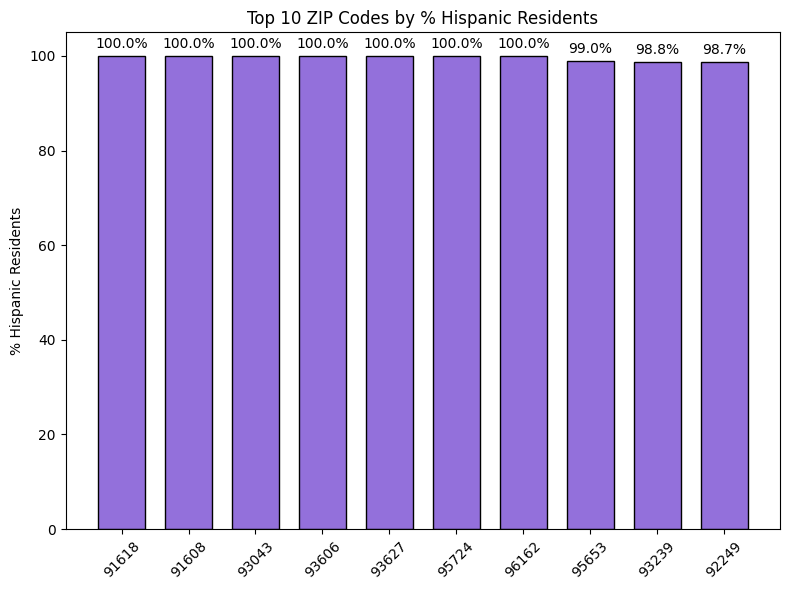

In [ ]:
# Top 10 ZIP codes by % Hispanic residents
top_hispanic = SDOH_df.nlargest(10, "ACS_PCT_HISPANIC_ZC")

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
bars = plt.bar(top_hispanic["ZIPCODE"].astype(str),
        top_hispanic["ACS_PCT_HISPANIC_ZC"],
        width=0.7, color="mediumpurple", edgecolor="black")

plt.xticks(rotation=45)
plt.ylabel("% Hispanic Residents")
plt.title("Top 10 ZIP Codes by % Hispanic Residents")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x position (center of bar)
        height + 1,                       # y position (just above bar)
        f"{height:.1f}%",                 # text label (one decimal place + % sign)
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

## Get top 10 % Hispanic residents and sort them highest → lowest
top_hispanic = (
    SDOH_df.nlargest(10, "ACS_PCT_HISPANIC_ZC")
    .sort_values("ACS_PCT_HISPANIC_ZC", ascending=False))


In [ ]:
#check what the actual percentages are

SDOH_df["ACS_PCT_HISPANIC_ZC"].describe()
top_hispanic[["ZIPCODE", "ACS_PCT_HISPANIC_ZC"]]

,ZIPCODE,ACS_PCT_HISPANIC_ZC
461,91618,100.00
462,91608,100.00
1090,93043,100.00
1324,93606,100.00
1346,93627,100.00
2263,95724,100.00
2264,96162,100.00
2203,95653,99.00
1148,93239,98.82
737,92249,98.71


#### Answer: ZIP codes 91618, 91608, 93043, 93606, 93627, 95724, and 96162 all have a 100% Hispanic residents population.




#### Question 4: Do ZIP code(s) with higher % Hispanic Residents also report higher % Fair/Poor Health?

Codebook: 'ACS_PCT_HISPANIC_ZC', '% FAIR OR POOR HEALTH'


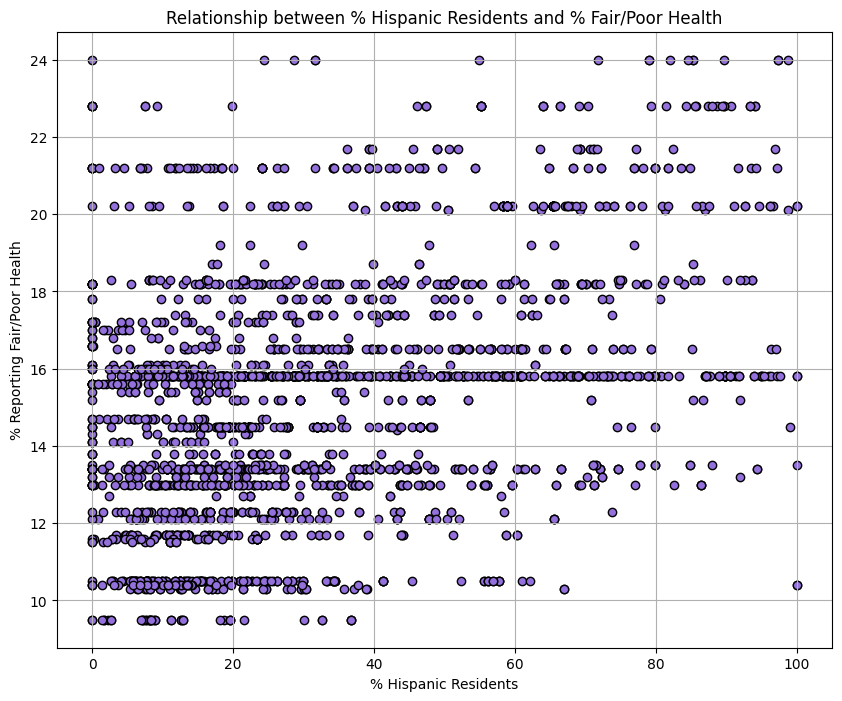

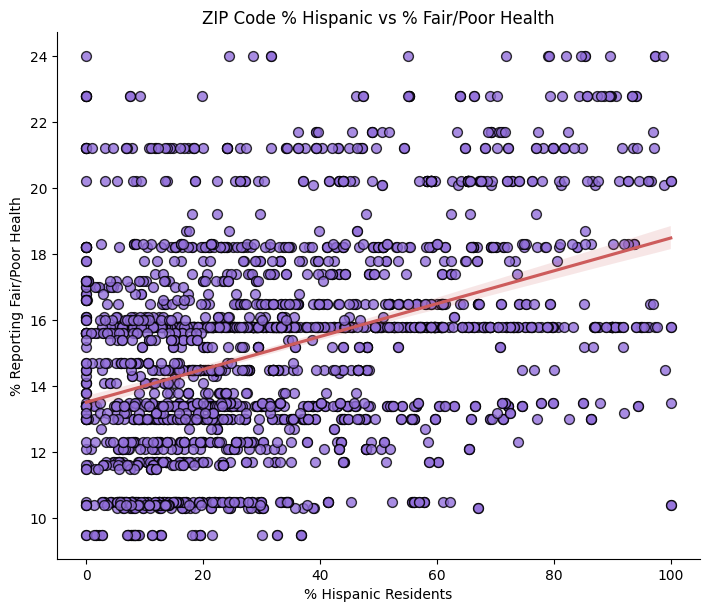

87066.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Pearson correlation: 0.391, p-value: 0.000


In [ ]:
#scatterplot 
plt.figure(figsize=(10,8))
plt.scatter(
    SDOH_df['ACS_PCT_HISPANIC_ZC'],
    SDOH_df['% Fair or Poor Health'],
    color='mediumpurple', edgecolor='black'
)
plt.xlabel('% Hispanic Residents')
plt.ylabel('% Reporting Fair/Poor Health')
plt.title('Relationship between % Hispanic Residents and % Fair/Poor Health')
plt.grid(True)
plt.show()

#linear regression line ( green )
import seaborn as sns

sns.lmplot(
    x='ACS_PCT_HISPANIC_ZC',
    y='% Fair or Poor Health',
    data=SDOH_df,
    height=6,
    aspect=1.2,
    scatter_kws={'s':50, 'color':'mediumpurple', 'edgecolor':'black'},
    line_kws={'color':'indianred'}
)
plt.xlabel('% Hispanic Residents')
plt.ylabel('% Reporting Fair/Poor Health')
plt.title('ZIP Code % Hispanic vs % Fair/Poor Health')
plt.show()



!python3 -m pip install scipy

#check correlation 
from scipy.stats import pearsonr

subset = SDOH_df[['ACS_PCT_HISPANIC_ZC','% Fair or Poor Health']].dropna()
corr, p_value = pearsonr(subset['ACS_PCT_HISPANIC_ZC'], subset['% Fair or Poor Health'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")


#### Answer: After creating a scatterplot and checking for a correlation between "% Hispanic Residents" and "% Fair/Poor Health" by ZIP code, we observed that the scatterplot shows an upward-sloping trend. This suggests that ZIP codes with higher percentages of Hispanic residents tend to also report higher percentages of Fair/Poor Health. 

#### Running a Pearson correlation, which measures the strength of a linear relationship between two variables (ranging from -1 to +1, where -1 is a negative correlation, 0 is no correlation, and +1 is a perfect positive correlation), we obtained a correlation coefficient of 0.391 with a p-value of 0.000. This indicates a moderate positive correlation that is statistically significant, meaning the observed relationship is unlikely due to random chance. In other words, ZIP codes with higher percentages of Hispanic residents tend to have somewhat higher percentages of residents reporting Fair/Poor Health.

#### Question 5: Which ZIP code(s) reports the highest % of residents with disabilities?

Codebook: 'ACS_PCT_DISABLE_ZC', 'ZIPCODE'

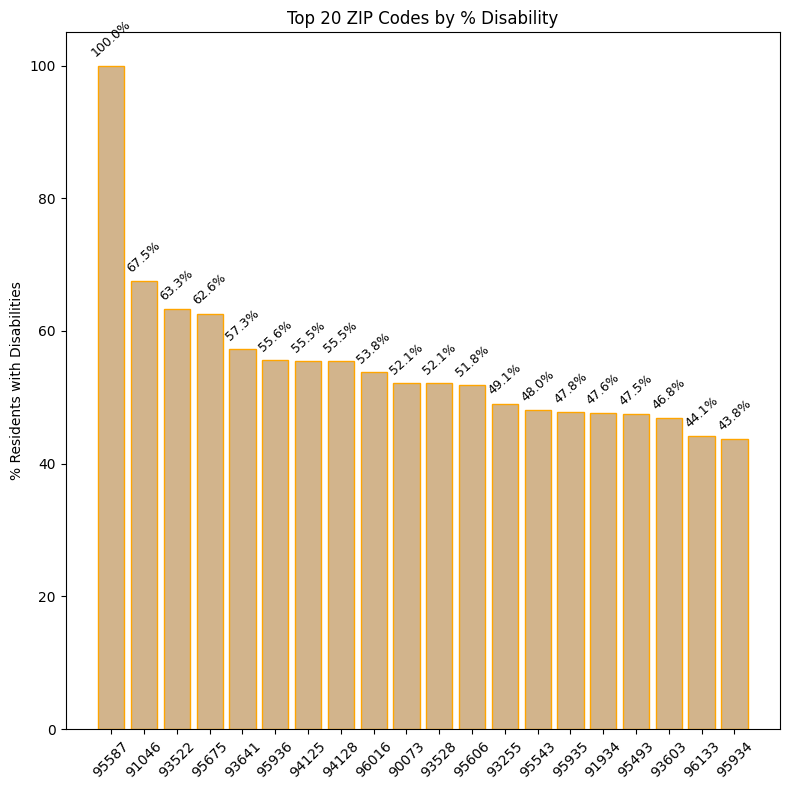

,ZIPCODE,ACS_PCT_DISABLE_ZC
2150,95587,100.00
298,91046,67.54
1282,93522,63.33
2224,95675,62.62
1359,93641,57.28
2399,95936,55.56
1556,94125,55.49
1557,94128,55.49
2467,96016,53.83
98,90073,52.15


In [ ]:
# top 20 ZIP codes by % disability
top_disability = SDOH_df.nlargest(20, 'ACS_PCT_DISABLE_ZC')

#  ZIPCODE as string for plotting
top_disability['ZIPCODE'] = top_disability['ZIPCODE'].astype(str)

# Plot
plt.figure(figsize=(8,8))
bars = plt.bar(
    top_disability['ZIPCODE'],
    top_disability['ACS_PCT_DISABLE_ZC'],
    color='tan', edgecolor='orange'
)
plt.xticks(rotation=45)
plt.ylabel('% Residents with Disabilities')
plt.title('Top 20 ZIP Codes by % Disability')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.9,
        f"{height:.1f}%",
        ha='center', va='bottom', rotation = 42, fontsize = 9
    )

plt.tight_layout()
plt.show()

#print chart just to double check: 
top_disability[['ZIPCODE','ACS_PCT_DISABLE_ZC']] 

#### Answer: The bar graph reveals that the ZIP code with the highest percentage of residents with disabilities is ZIP code 95587, with 100% of its residents being disabled.

#### Question 6: Do ZIP codes with higher % disability also report higher % Fair/Poor Health?

Codebook: 'ACS_PCT_DISABLE_ZC', '% Fair or Poor Health'

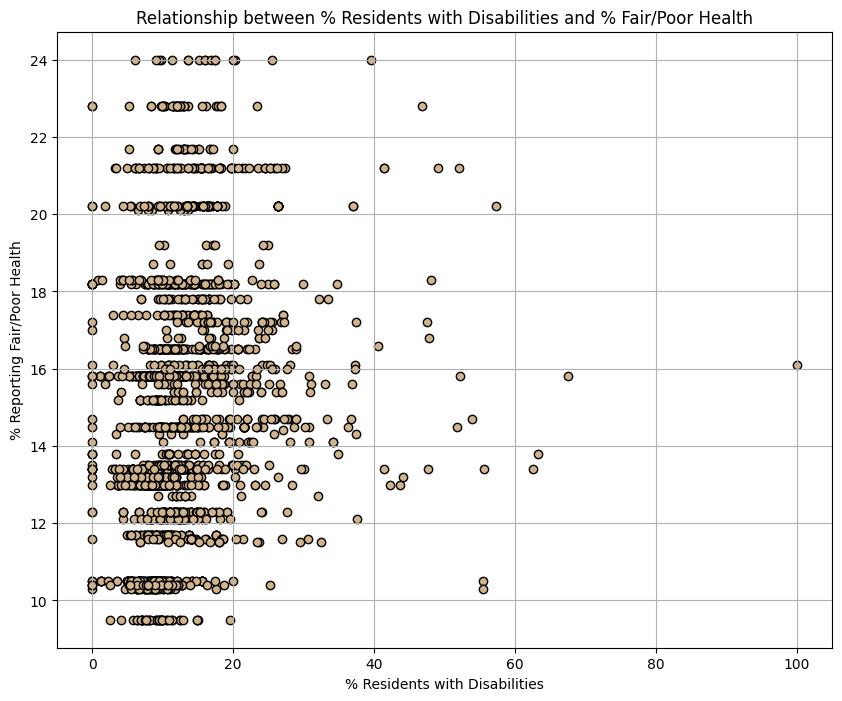

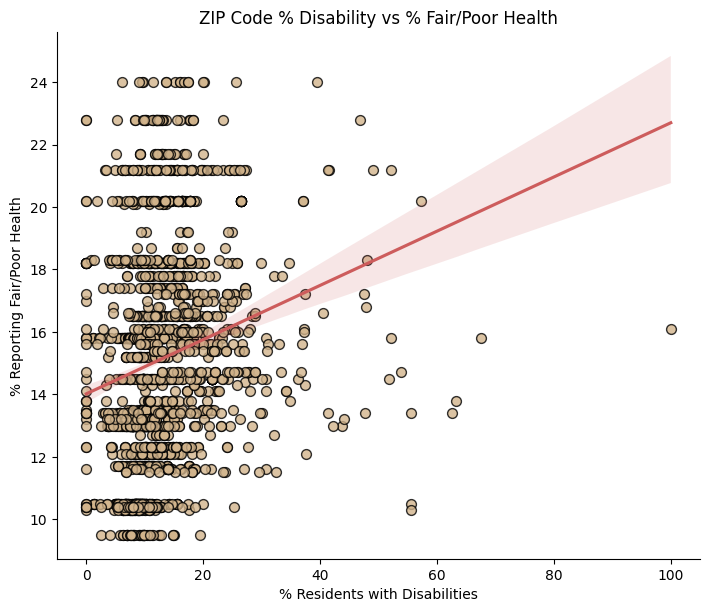

Pearson correlation: 0.197, p-value: 0.000


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(
    SDOH_df['ACS_PCT_DISABLE_ZC'],
    SDOH_df['% Fair or Poor Health'],
    color='tan', edgecolor='black'
)
plt.xlabel('% Residents with Disabilities')
plt.ylabel('% Reporting Fair/Poor Health')
plt.title('Relationship between % Residents with Disabilities and % Fair/Poor Health')
plt.grid(True)
plt.show()

# + regression line
sns.lmplot(
    x='ACS_PCT_DISABLE_ZC',
    y='% Fair or Poor Health',
    data=SDOH_df,
    height=6,
    aspect=1.2,
    scatter_kws={'s':50, 'color':'tan', 'edgecolor':'black'},
    line_kws={'color':'indianred'}
)
plt.xlabel('% Residents with Disabilities')
plt.ylabel('% Reporting Fair/Poor Health')
plt.title('ZIP Code % Disability vs % Fair/Poor Health')
plt.show()

# Pearson correlation
subset = SDOH_df[['ACS_PCT_DISABLE_ZC','% Fair or Poor Health']].dropna()
corr, p_value = pearsonr(subset['ACS_PCT_DISABLE_ZC'], subset['% Fair or Poor Health'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")


#### Answer: After creating a scatterplot and checking for a correlation between "% Residents with Disabilities" and "% Fair/Poor Health" by ZIP code, we observed that the scatterplot shows a slight upward-sloping trend. This suggests that ZIP codes with higher percentages of disabled residents tend to also report slightly higher percentages of Fair/Poor Health. 

#### Running a Pearson correlation, which measures the strength of a linear relationship between two variables (ranging from -1 to +1, where -1 is a negative correlation, 0 is no correlation, and +1 is a perfect positive correlation), we obtained a correlation coefficient of 0.197 with a p-value of 0.000. This indicates a weak positive correlation that is statistically significant, meaning the observed relationship is unlikely due to random chance. In other words, ZIP codes with higher percentages of disabled residents tend to have somewhat higher percentages of residents reporting Fair/Poor Health, although the effect is weaker than that observed with % Hispanic residents.

#### Question 7: Which ZIP code(s) report the highest average physically unhealthy days?

Codebook: 'Average Number of Physically Unhealthy Days': 

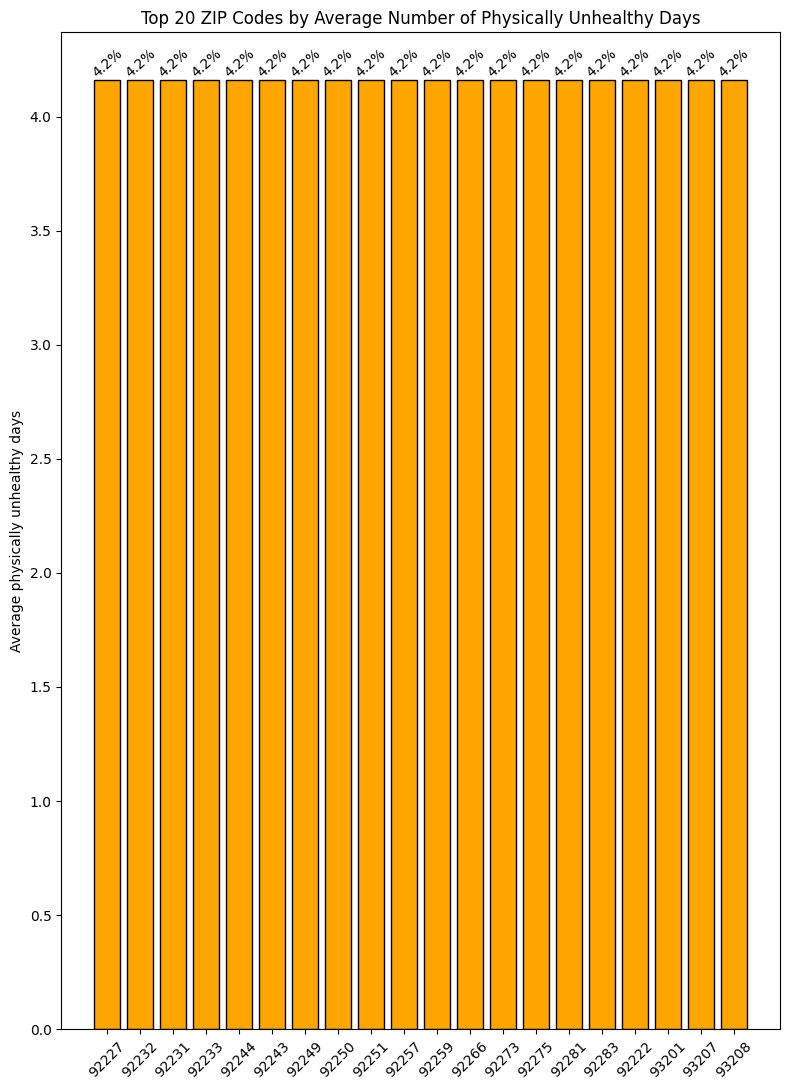

,ZIPCODE,Average Number of Physically Unhealthy Days
723,92227,4.161616
725,92232,4.161616
726,92231,4.161616
727,92233,4.161616
735,92244,4.161616
736,92243,4.161616
737,92249,4.161616
738,92250,4.161616
739,92251,4.161616
746,92257,4.161616


In [ ]:
# top 20 ZIP codes by 'Average Number of Physically Unhealthy Days': 
top_phy_unhealthy = SDOH_df.nlargest(20, 'Average Number of Physically Unhealthy Days')

#  ZIPCODE as string for plotting
top_phy_unhealthy['ZIPCODE'] = top_phy_unhealthy['ZIPCODE'].astype(str)

# Plot
plt.figure(figsize=(8,11))
bars = plt.bar(
    top_phy_unhealthy['ZIPCODE'],
    top_phy_unhealthy['Average Number of Physically Unhealthy Days'],
    color='orange', edgecolor='black'
)
plt.xticks(rotation=45)
plt.ylabel('Average physically unhealthy days')
plt.title('Top 20 ZIP Codes by Average Number of Physically Unhealthy Days')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.0,
        f"{height:.1f}%",
        ha='center', va='bottom', rotation = 42, fontsize = 10
    )

plt.tight_layout()
plt.show()

#print chart just to double check: 
top_phy_unhealthy[['ZIPCODE','Average Number of Physically Unhealthy Days']] 

#### Answer: The bar graph shows the top 20 ZIP codes by Average Number of Physically Unhealthy Days. 17 of these ZIP codes share the same average value of approximately 4.16 physically unhealthy days, while the remaining three have slightly lower averages (4.1608 days). This indicates that many ZIP codes report very similar levels of physically unhealthy days across the population.

#### Question 8: Do ZIP codes with higher % Hispanic residents report more physically unhealthy days?

Codebook: 'ACS_PCT_HISPANIC_ZC', 'Average Number of Physically Unhealthy Days'

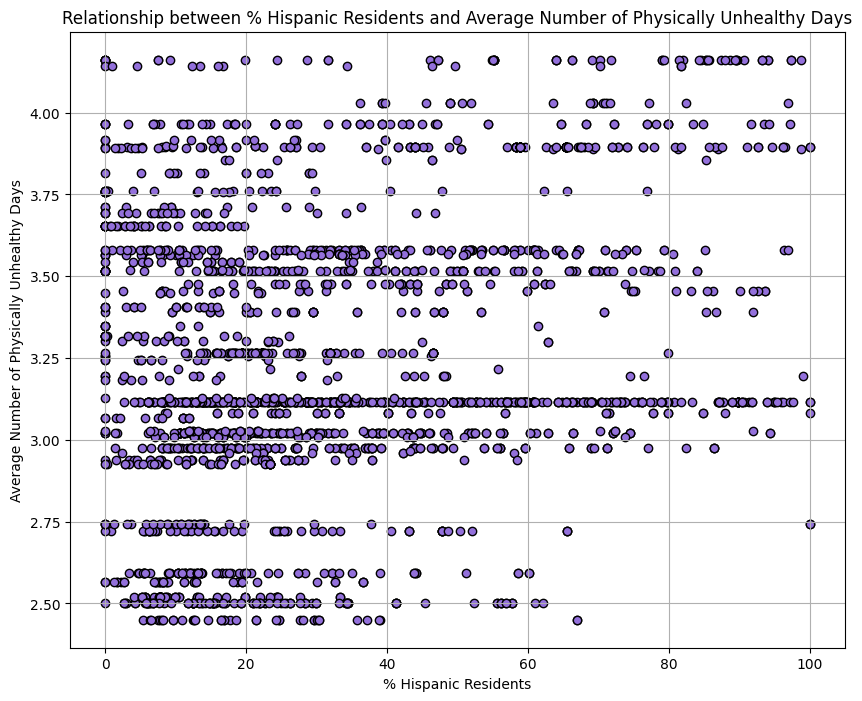

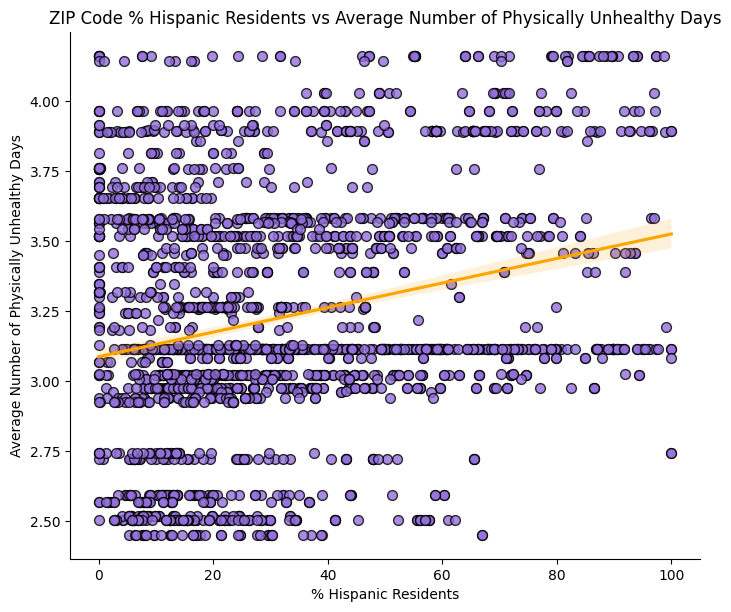

Pearson correlation: 0.250, p-value: 0.000


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(
    SDOH_df['ACS_PCT_HISPANIC_ZC'],
    SDOH_df['Average Number of Physically Unhealthy Days'],
    color='mediumpurple', edgecolor='black'
)
plt.xlabel('% Hispanic Residents')
plt.ylabel('Average Number of Physically Unhealthy Days')
plt.title('Relationship between % Hispanic Residents and Average Number of Physically Unhealthy Days')
plt.grid(True)
plt.show()

# + regression line
sns.lmplot(
    x='ACS_PCT_HISPANIC_ZC',
    y='Average Number of Physically Unhealthy Days',
    data=SDOH_df,
    height=6,
    aspect=1.2,
    scatter_kws={'s':50, 'color':'mediumpurple', 'edgecolor':'black'},
    line_kws={'color':'orange'}
)
plt.xlabel('% Hispanic Residents')
plt.ylabel('Average Number of Physically Unhealthy Days')
plt.title('ZIP Code % Hispanic Residents vs Average Number of Physically Unhealthy Days')
plt.show()

# Pearson correlation
subset = SDOH_df[['ACS_PCT_HISPANIC_ZC','Average Number of Physically Unhealthy Days']].dropna()
corr, p_value = pearsonr(subset['ACS_PCT_HISPANIC_ZC'], subset['Average Number of Physically Unhealthy Days'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")

#### Answer: After creating a scatterplot and checking for a correlation between "% Hispanic Residents" and "Average Number of Physically Unhealthy Days," we observed a slightly upward-sloping trend, suggesting that ZIP codes with higher percentages of Hispanic residents tend to report slightly more physically unhealthy days.

#### Running a Pearson correlation, which measures the strength of a linear relationship between two variables (ranging from -1 to +1, where -1 is a perfect negative correlation, 0 is no correlation, and +1 is a perfect positive correlation), we obtained a correlation coefficient of 0.250 with a p-value of 0.000. This indicates a weak positive correlation that is statistically significant, confirming that ZIP codes with higher percentages of Hispanic residents tend to report slightly more physically unhealthy days.

#### Question 9: Do ZIP codes with higher % disabled residents report more physically unhealthy days?

Codebook: 'ACS_PCT_DISABLE_ZC', 'Average Number of Physically Unhealthy Days'

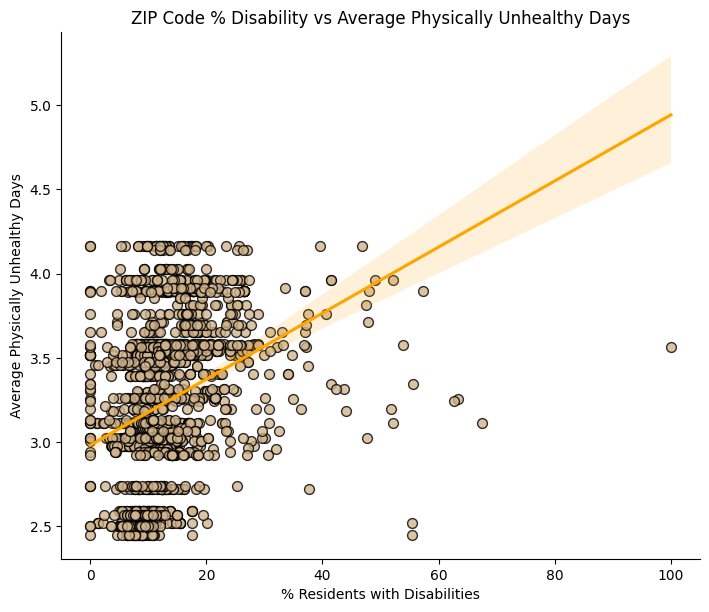

Pearson correlation: 0.322, p-value: 0.000


In [ ]:
# Scatter plot + regression line
sns.lmplot(
    x='ACS_PCT_DISABLE_ZC',
    y='Average Number of Physically Unhealthy Days',
    data=SDOH_df,
    height=6,
    aspect=1.2,
    scatter_kws={'s':50, 'color':'tan', 'edgecolor':'black'},
    line_kws={'color':'orange'}
)
plt.xlabel('% Residents with Disabilities')
plt.ylabel('Average Physically Unhealthy Days')
plt.title('ZIP Code % Disability vs Average Physically Unhealthy Days')
plt.show()

# Pearson correlation
subset = SDOH_df[['ACS_PCT_DISABLE_ZC','Average Number of Physically Unhealthy Days']].dropna()
corr, p_value = pearsonr(subset['ACS_PCT_DISABLE_ZC'], subset['Average Number of Physically Unhealthy Days'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")


#### Answer: After creating a scatterplot and checking for a correlation between "% Residents with Disabilities" and "Average Number of Physically Unhealthy Days," we observed an upward-sloping trend, suggesting that ZIP codes with higher percentages of Disabled residents tend to report more physically unhealthy days.

#### Running a Pearson correlation, which measures the strength of a linear relationship between two variables (ranging from -1 to +1, where -1 is a perfect negative correlation, 0 is no correlation, and +1 is a perfect positive correlation), we obtained a correlation coefficient of 0.322 with a p-value of 0.000. This indicates a moderate positive correlation that is statistically significant, confirming that ZIP codes with higher percentages of Disabled residents tend to report more physically unhealthy days.

#### Final Question: Do ZIP codes with higher % residents who don’t speak English well report higher % Fair/Poor Health?

CodeBbook: 'ACS_PCT_ENGL_NOT_WELL_ZC', '% Fair or Poor Health'

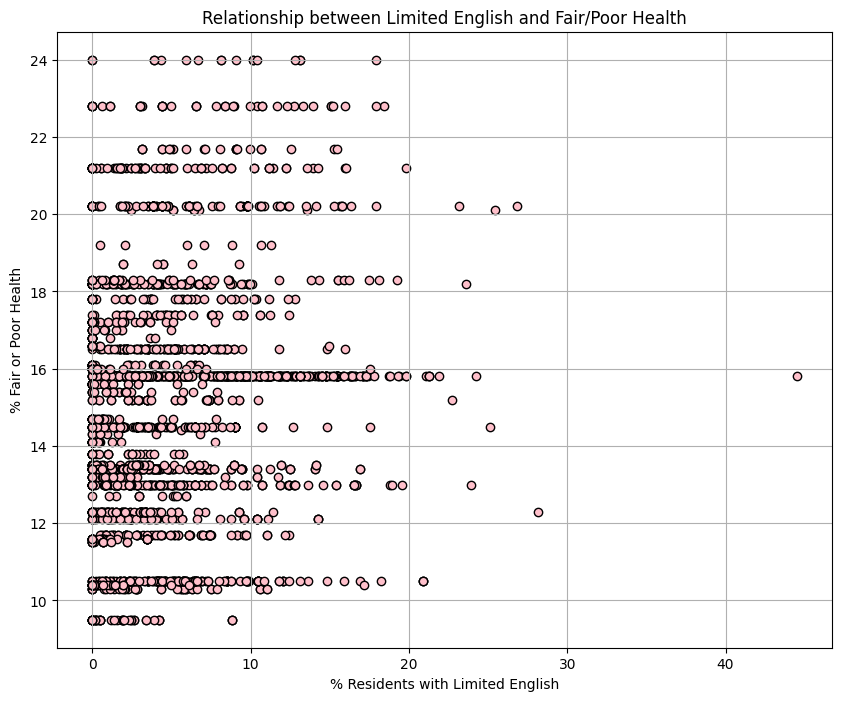

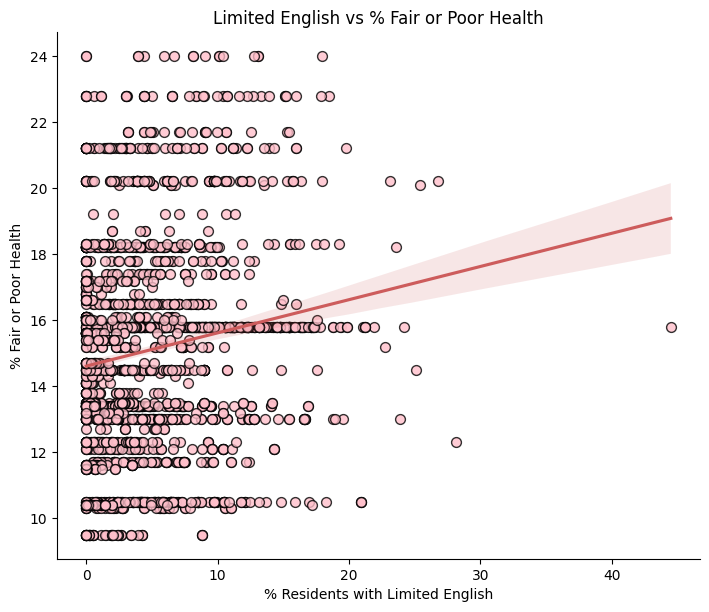

Pearson correlation: 0.153, p-value: 0.000


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(
    SDOH_df['ACS_PCT_ENGL_NOT_WELL_ZC'],
    SDOH_df['% Fair or Poor Health'],
    color='pink', edgecolor='black'
)
plt.xlabel('% Residents with Limited English')
plt.ylabel('% Fair or Poor Health')
plt.title('Relationship between Limited English and Fair/Poor Health')
plt.grid(True)
plt.show()

# Regression line
sns.lmplot(
    x='ACS_PCT_ENGL_NOT_WELL_ZC',
    y='% Fair or Poor Health',
    data=SDOH_df,
    height=6,
    aspect=1.2,
    scatter_kws={'s':50, 'color':'pink', 'edgecolor':'black'},
    line_kws={'color':'indianred'}
)
plt.xlabel('% Residents with Limited English')
plt.ylabel('% Fair or Poor Health')
plt.title('Limited English vs % Fair or Poor Health')
plt.show()

# Pearson correlation
subset = SDOH_df[['ACS_PCT_ENGL_NOT_WELL_ZC','% Fair or Poor Health']].dropna()
corr, p_value = pearsonr(subset['ACS_PCT_ENGL_NOT_WELL_ZC'], subset['% Fair or Poor Health'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")


#### Answer: After creating a scatterplot and regression line between "% Residents with English Not Well" and "% Fair or Poor Health," we observed a slight upward-sloping trend. This suggests that ZIP codes with higher percentages of residents who do not speak English well tend to report slightly higher percentages of poor or fair health.

#### Running a Pearson correlation, which measures the strength of a linear relationship between two variables (ranging from -1 to +1, where -1 is a negative correlation, 0 is no correlation, and +1 is a perfect positive correlation), we obtained a correlation coefficient of 0.153 with a p-value of 0.000. This indicates a weak positive correlation that is statistically significant, confirming that ZIP codes with higher limited English proficiency tend to report slightly worse health outcomes.